In [31]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
import warnings
warnings.filterwarnings(action = "ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor




In [90]:
diamonds=pd.read_csv('diamonds.csv')

In [33]:
diamonds.head()


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [34]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  1200 non-null   float64
 1   Cut           1200 non-null   object 
 2   Color         1200 non-null   object 
 3   Clarity       1200 non-null   object 
 4   Polish        1200 non-null   object 
 5   Symmetry      1200 non-null   object 
 6   Report        1200 non-null   object 
 7   Price         1200 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 75.1+ KB


In [35]:

diamonds["Cut"].value_counts()

Very Good          488
Ideal              478
Good               142
Signature-Ideal     54
Fair                38
Name: Cut, dtype: int64

In [36]:
diamonds["Color"].value_counts()

G    279
H    210
F    207
I    197
E    166
D    141
Name: Color, dtype: int64

In [37]:
diamonds["Clarity"].value_counts()

SI1     426
VS2     299
VS1     258
VVS2    123
VVS1     55
IF       38
FL        1
Name: Clarity, dtype: int64

In [38]:


diamonds["Price"] = diamonds["Price"].astype("float64")

In [39]:
diamonds.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0


In [40]:
1
diamonds.describe()

,Carat Weight,Price
count,1200.000000,1200.000000
mean,1.317742,11462.485000
std,0.470047,10042.441364
min,0.750000,2396.000000
25%,1.010000,5110.750000
50%,1.120000,7666.000000
75%,1.540000,13660.500000
max,2.740000,96493.000000


In [41]:
print(diamonds.rename(columns={'Cut': 'cutt', 'Clarity': 'Clar'}))


      Carat Weight             cutt Color  Clar Polish Symmetry Report  \
0             1.10            Ideal     H   SI1     VG       EX    GIA   
1             0.83            Ideal     H   VS1     ID       ID   AGSL   
2             0.85            Ideal     H   SI1     EX       EX    GIA   
3             0.91            Ideal     E   SI1     VG       VG    GIA   
4             0.83            Ideal     G   SI1     EX       EX    GIA   
...            ...              ...   ...   ...    ...      ...    ...   
1195          1.21  Signature-Ideal     E  VVS2     ID       ID   AGSL   
1196          2.00        Very Good     G   SI1     EX       EX    GIA   
1197          1.20        Very Good     H   VS2     VG       VG    GIA   
1198          1.08        Very Good     H   VS1     EX       EX    GIA   
1199          2.37            Ideal     E   VS1     EX       EX    GIA   

        Price  
0      5169.0  
1      3470.0  
2      3183.0  
3      4370.0  
4      3171.0  
...       ...  

In [42]:
diamonds.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0


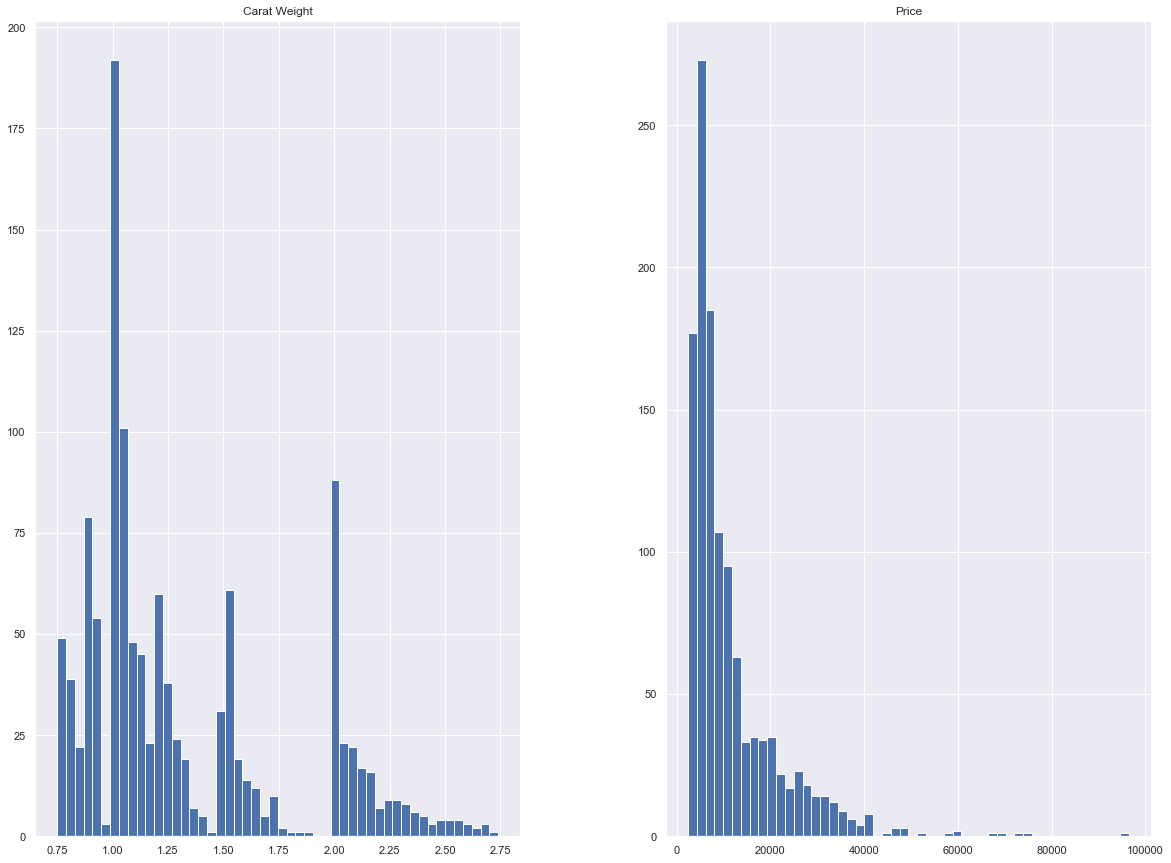

In [43]:
diamonds.hist(bins = 50, figsize = (20,15))

plt.show()

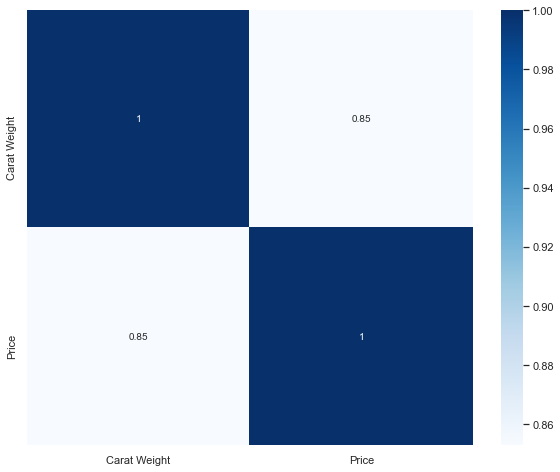

In [44]:
corr_matrix = diamonds.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")

plt.show()

x , y and z are correlated with the price.
price and carat have the highest correlation.
depth and table are weakly correlated.


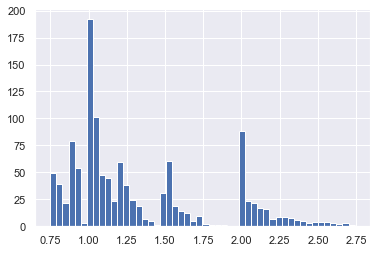

In [45]:
diamonds["Carat Weight"].hist(bins = 50)

plt.show()

In [46]:
diamonds["Carat Weight"].max()


2.74

In [47]:
diamonds["Carat Weight"].min()

0.75

In [48]:
# Divide by 0.4 to limit the number of carat strata

diamonds["carat_cat"] = np.ceil(diamonds["Carat Weight"]/0.4)

# Label those above 5 as 5
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

In [49]:
diamonds["carat_cat"].value_counts()

3.0    613
5.0    273
4.0    240
2.0     74
Name: carat_cat, dtype: int64

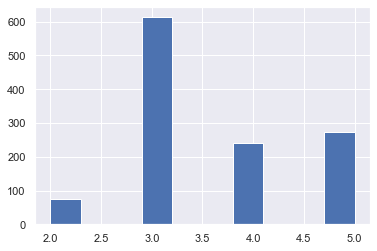

In [50]:
diamonds["carat_cat"].hist()

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(diamonds,diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [52]:
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

3.0    0.5125
5.0    0.2250
4.0    0.2000
2.0    0.0625
Name: carat_cat, dtype: float64

In [53]:
strat_test_set.describe()

,Carat Weight,Price,carat_cat
count,240.000000,240.000000,240.00000
mean,1.319542,11340.562500,3.58750
std,0.479442,9112.438158,0.90596
min,0.750000,2523.000000,2.00000
25%,1.007500,5152.500000,3.00000
50%,1.135000,7708.500000,3.00000
75%,1.530000,13765.250000,4.00000
max,2.740000,47741.000000,5.00000


Data Visualisation


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


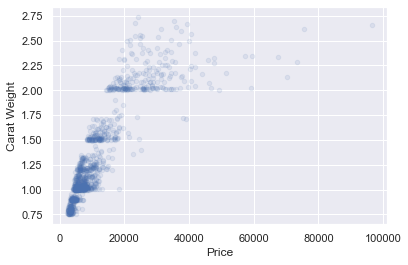

In [54]:
diamonds.plot(kind="scatter", x="Price", y="Carat Weight",alpha = 0.1)

plt.show()

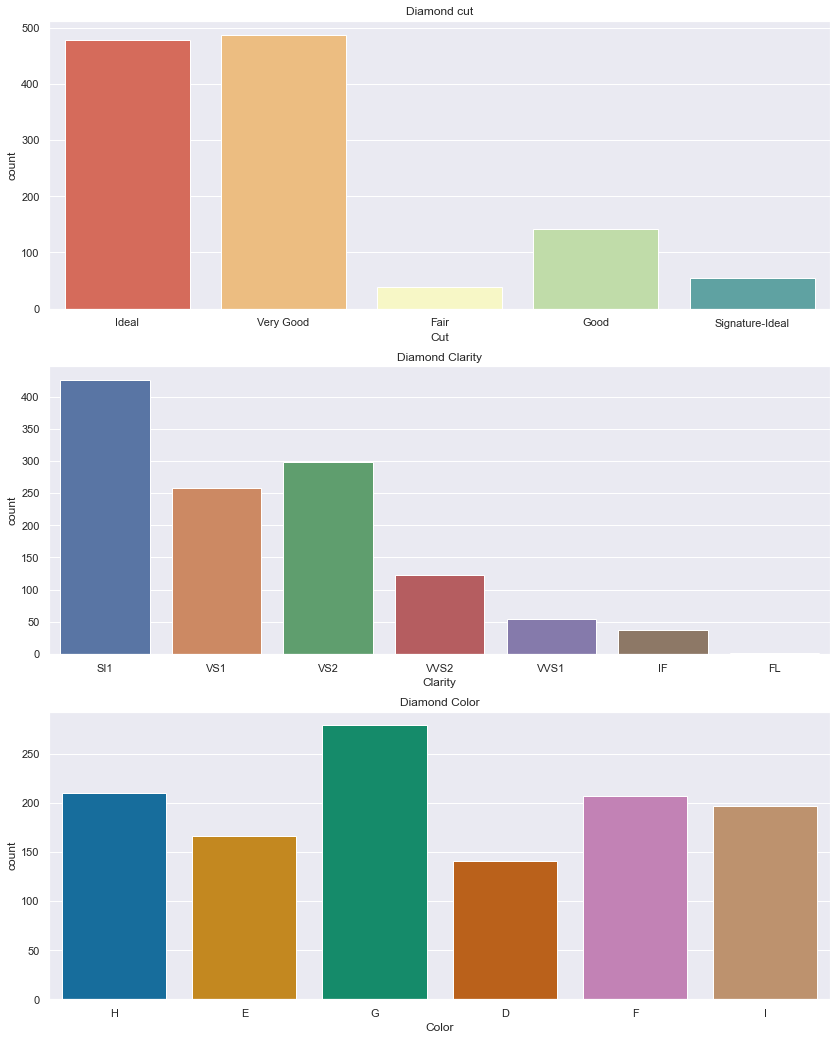

In [55]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.countplot('Cut',data = diamonds, ax=ax[0],palette="Spectral")
sns.countplot('Clarity',data = diamonds, ax=ax[1],palette="deep")
sns.countplot('Color',data = diamonds, ax=ax[2],palette="colorblind")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
plt.show()

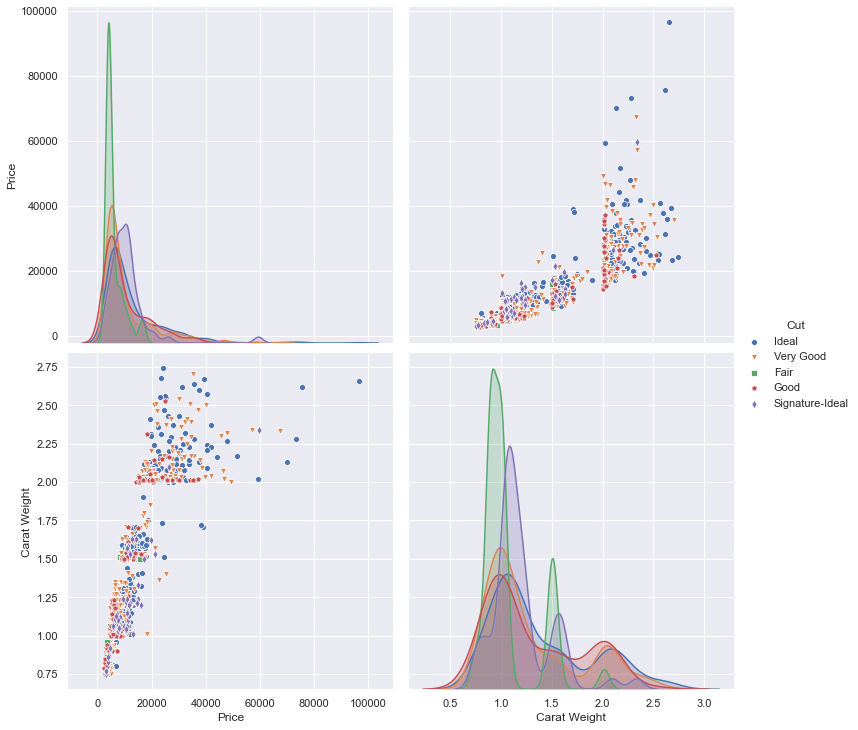

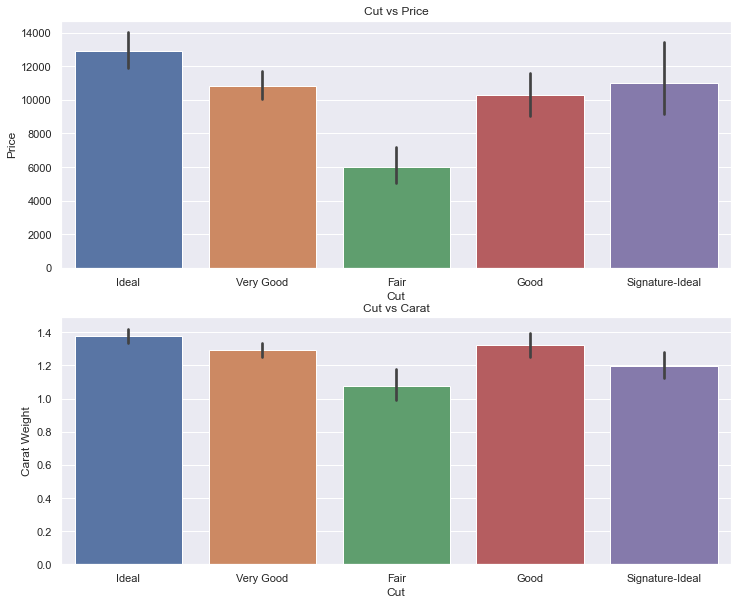

In [56]:
sns.pairplot(diamonds[["Price","Carat Weight","Cut"]], markers = ["o","v","s","p","d"],hue="Cut", height=5)

plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Cut",y="Price",data = diamonds,ax=ax[0])
sns.barplot(x="Cut",y="Carat Weight",data = diamonds, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")

plt.show()

Fair cut diamonds weigh the most but are not the most expensive diamonds.
Premium cut diamonds are the most expensive diamonds.
Ideal cut diamonds weigh less and are cheapest diamonds.
We can see that price of diamond is dependent on the cut.

Conclusions

J color diamonds are the most expensive and the heaviest diamonds.
The two plots are very similar.
Thus, it can be concluded that the heavier diamond is expensive, if only color is considered.

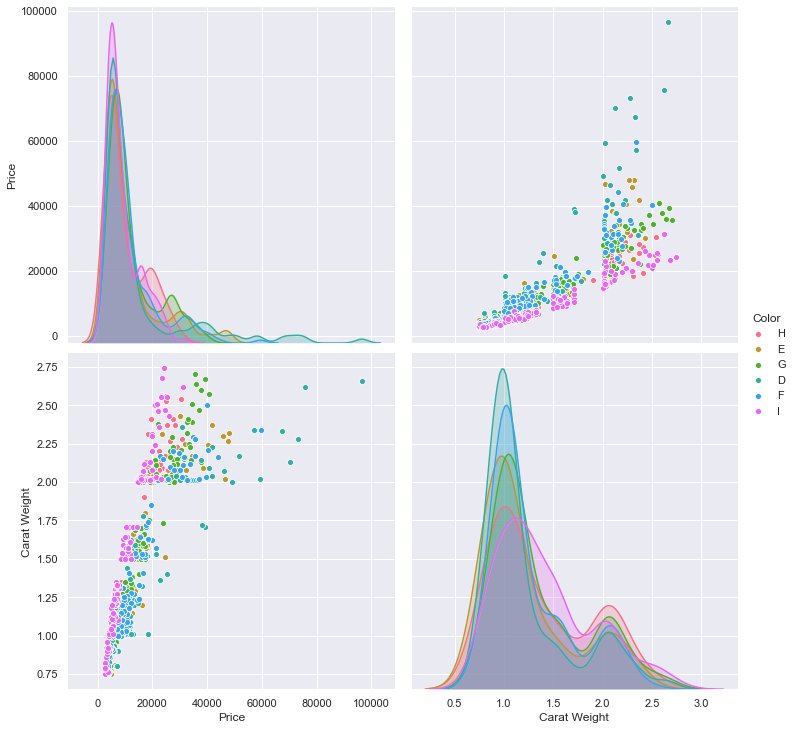

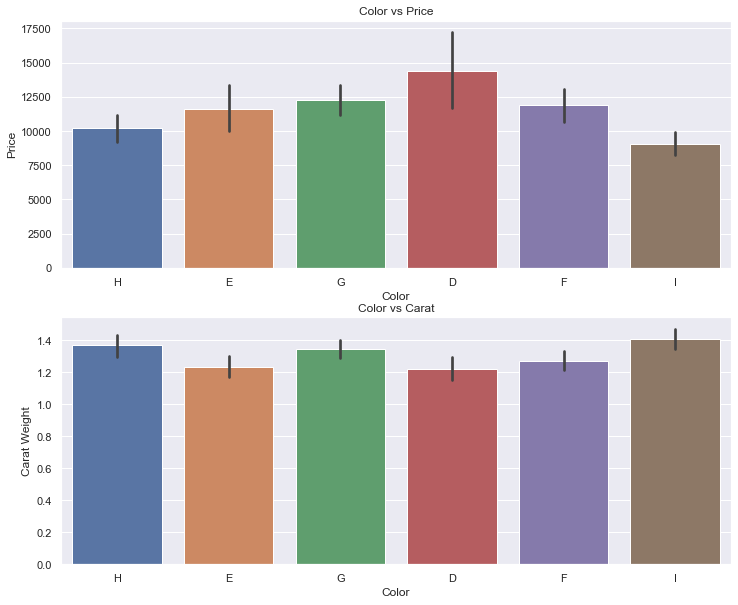

In [57]:
sns.pairplot(diamonds[["Price","Carat Weight","Color"]], hue="Color", height=5, palette="husl")

plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Color",y="Price",data = diamonds,ax=ax[0])
sns.barplot(x="Color",y="Carat Weight",data = diamonds, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")

plt.show()

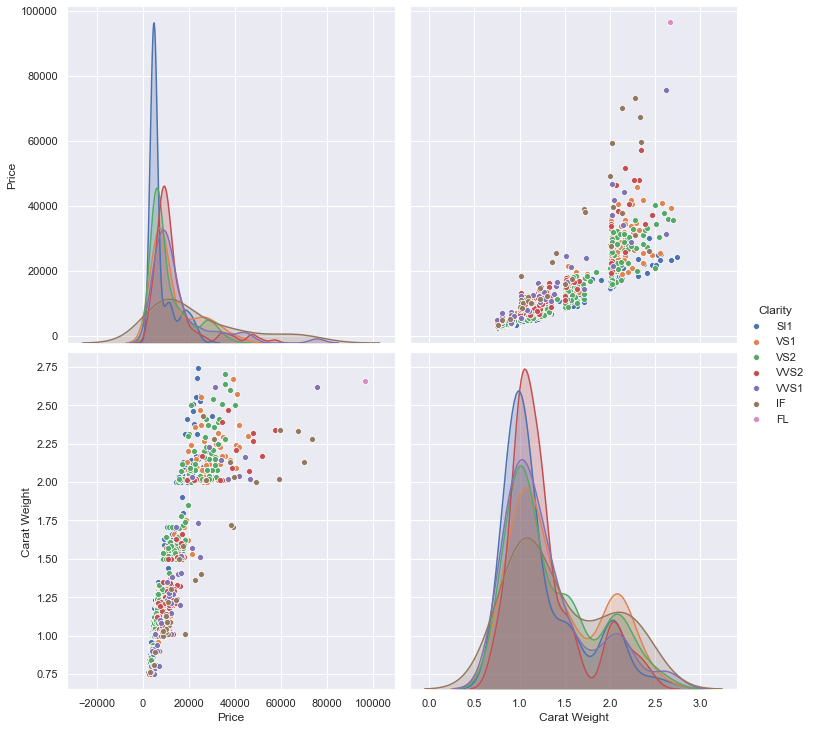

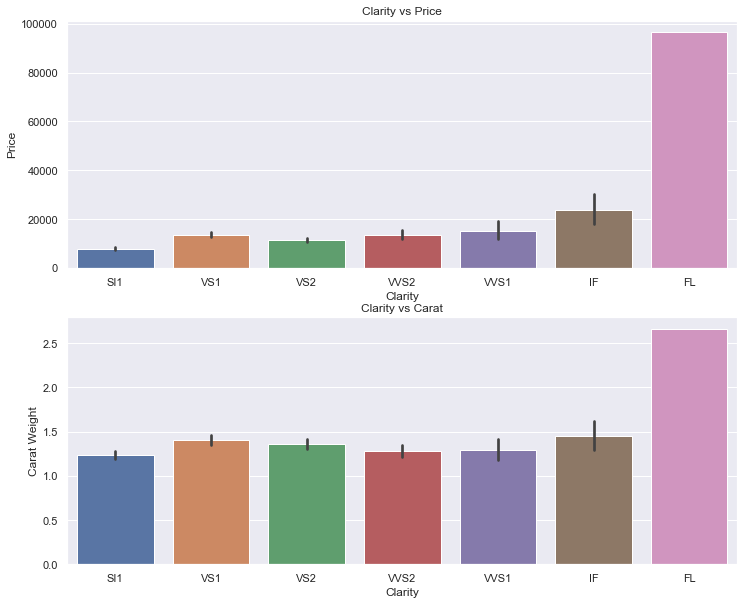

In [61]:
sns.pairplot(diamonds[["Price","Carat Weight","Clarity"]],hue="Clarity", height=5)
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Clarity",y="Price",data = diamonds,ax=ax[0])
sns.barplot(x="Clarity",y="Carat Weight",data = diamonds, ax=ax[1])
ax[0].set_title("Clarity vs Price")
ax[1].set_title("Clarity vs Carat")
plt.show()

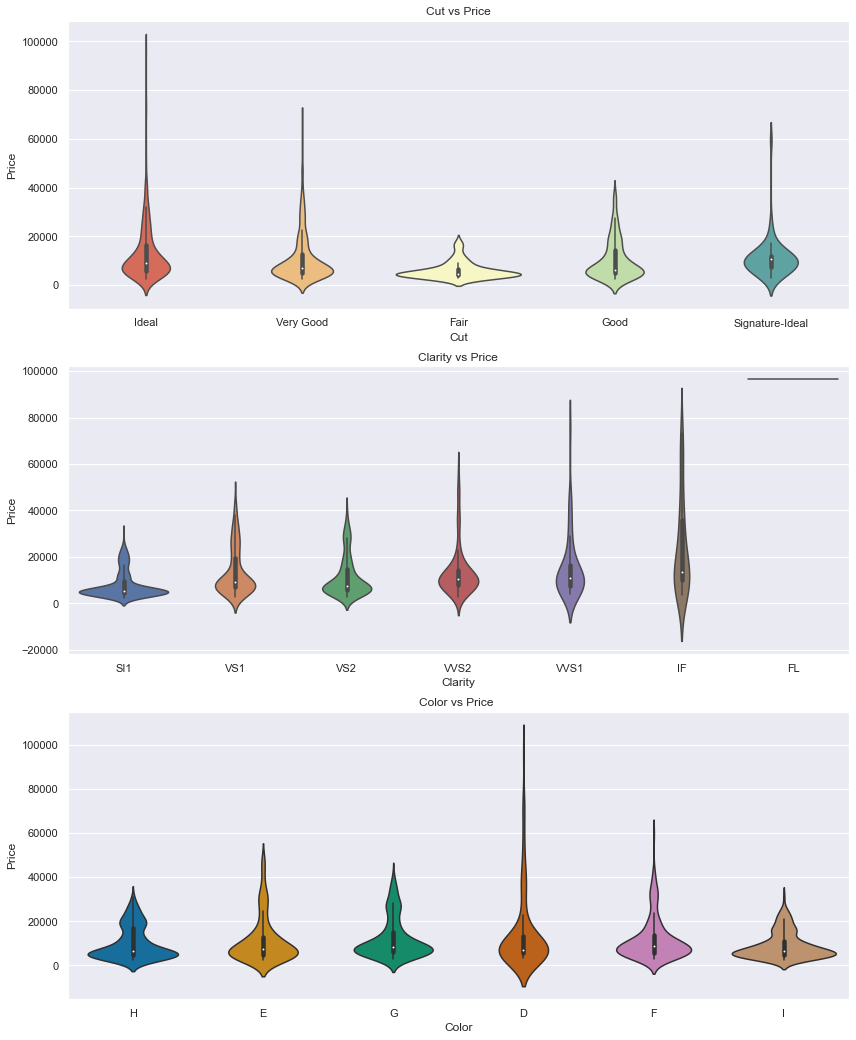

In [62]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.violinplot(x='Cut',y='Price',data = diamonds, ax=ax[0],palette="Spectral")
sns.violinplot(x='Clarity',y='Price',data = diamonds, ax=ax[1],palette="deep")
sns.violinplot(x='Color',y='Price',data = diamonds, ax=ax[2],palette="colorblind")
ax[0].set_title("Cut vs Price")
ax[1].set_title("Clarity vs Price")
ax[2].set_title("Color vs Price ")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8E234B040>]],
      dtype=object)

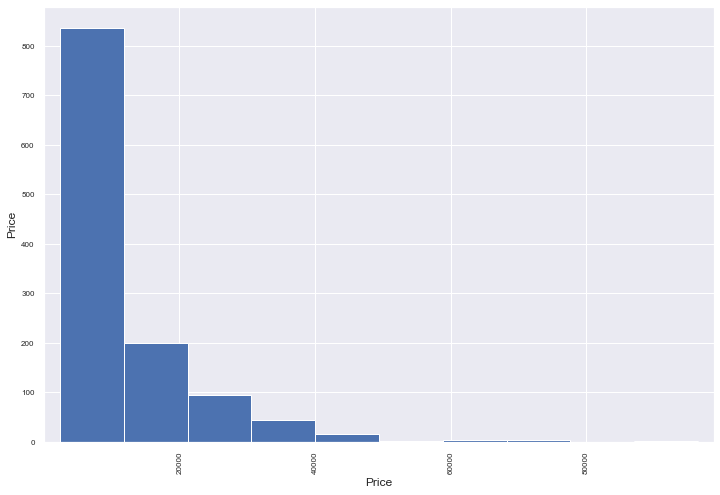

In [63]:
from pandas.plotting import scatter_matrix

attributes = ["Polish","Symmetry","Report","Price"]
scatter_matrix(diamonds[attributes], figsize=(12, 8))

ML Algorithms

In [64]:
sample_incomplete_rows = diamonds[diamonds.isnull().any(axis=1)].head()
sample_incomplete_rows

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,carat_cat


In [67]:
diamonds = strat_train_set.drop("Price", axis=1)
diamonds_label = strat_train_set["Price"].copy()
diamonds_only_num = diamonds.drop(["Cut","Clarity","Color","Polish","Symmetry","Report"],axis=1)
diamonds_only_num.head()

,Carat Weight,carat_cat
685,0.82,3.0
451,1.08,3.0
1010,1.55,4.0
1079,1.01,3.0
357,1.08,3.0



Feature Scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Therefore, it is necessary to feature scale all the features of diamond dataset. There are two ways of doing feature scaling -min-max scaling and standardization. I will be using standardization as it is not affected by outliers


In [68]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diamonds_scaled_num = std_scaler.fit_transform(diamonds_only_num)

diamonds_scaled_num

array([[-1.06332024, -0.65676495],
       [-0.50738238, -0.65676495],
       [ 0.4975822 ,  0.44742831],
       ...,
       [-0.40047126, -0.65676495],
       [-0.35770681, -0.65676495],
       [-0.67844019, -0.65676495]])

In [69]:
pd.DataFrame(diamonds_scaled_num).head()

,0,1
0,-1.063320,-0.656765
1,-0.507382,-0.656765
2,0.497582,0.447428
3,-0.657058,-0.656765
4,-0.507382,-0.656765


In [72]:
diamonds_cat = diamonds[["Cut","Color","Clarity","Polish","Symmetry","Report"]]
diamonds_cat.head()

,Cut,Color,Clarity,Polish,Symmetry,Report
685,Ideal,D,SI1,EX,EX,GIA
451,Ideal,D,SI1,VG,VG,GIA
1010,Ideal,I,VS1,ID,ID,AGSL
1079,Ideal,I,VVS1,ID,ID,AGSL
357,Ideal,H,SI1,ID,ID,AGSL


In [73]:

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

diamonds_cat_encoded.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [74]:
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Signature-Ideal', 'Very Good'],
       dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I'], dtype=object),
 array(['FL', 'IF', 'SI1', 'VS1', 'VS2', 'VVS1', 'VVS2'], dtype=object),
 array(['EX', 'G', 'ID', 'VG'], dtype=object),
 array(['EX', 'G', 'ID', 'VG'], dtype=object),
 array(['AGSL', 'GIA'], dtype=object)]

In [75]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_only_num)
cat_attribs = ["Cut","Color","Clarity","Polish","Symmetry","Report"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(),num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

diamonds_prepared = pipeline.fit_transform(diamonds)

In [76]:

diamonds_prepared

<960x30 sparse matrix of type '<class 'numpy.float64'>'
	with 7680 stored elements in Compressed Sparse Row format>

In [77]:

pd.DataFrame(diamonds_prepared).head()

,0
0,"(0, 0)\t-1.0633202395267267\n (0, 1)\t-0.65..."
1,"(0, 0)\t-0.5073823849270804\n (0, 1)\t-0.65..."
2,"(0, 0)\t0.49758219838766443\n (0, 1)\t0.447..."
3,"(0, 0)\t-0.6570579611654468\n (0, 1)\t-0.65..."
4,"(0, 0)\t-0.5073823849270804\n (0, 1)\t-0.65..."


In [78]:

diamonds_prepared.shape

(960, 30)

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

X_test = strat_test_set.drop("Price",axis=1)
y_test = strat_test_set["Price"].copy()

model_name = []
rmse_train_scores = []
cv_rmse_scores = []
accuracy_models = []
rmse_test_scores = []

def model_performance(modelname,model,diamonds = diamonds_prepared, diamonds_labels = diamonds_label,
                      X_test = X_test,y_test = y_test,
                      pipeline=pipeline, cv = True):
    
    model_name.append(modelname)
    
    model.fit(diamonds,diamonds_labels)
    
    predictions = model.predict(diamonds)
    mse_train_score = mean_squared_error(diamonds_labels, predictions)
    rmse_train_score = np.sqrt(mse_train_score)
    cv_rmse = np.sqrt(-cross_val_score(model,diamonds,diamonds_labels,
                                       scoring = "neg_mean_squared_error",cv=10))
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE_Train: %.4f" %rmse_train_score)
    rmse_train_scores.append(rmse_train_score)
    print("CV_RMSE: %.4f" %cv_rmse_mean)
    cv_rmse_scores.append(cv_rmse_mean)
    
    
    print("---------------------TEST-------------------")
    X_test_prepared = pipeline.transform(X_test)
    
    test_predictions = model.predict(X_test_prepared)
    mse_score = mean_squared_error(y_test,test_predictions)
    rmse_score = np.sqrt(mse_score)
    
    print("RMSE_Test: %.4f" %rmse_score)
    rmse_test_scores.append(rmse_score)
    
    accuracy = (model.score(X_test_prepared,y_test)*100)
    print("accuracy: "+ str(accuracy) + "%")
    accuracy_models.append(accuracy)
    
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 5]
    some_labels = y_test.iloc[start:start + 5]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:    :", list(some_labels))
    
    
    plt.scatter(y_test,test_predictions)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "go--")
    plt.show()

Linear Regression

RMSE_Train: 3608.4637
CV_RMSE: 3955.7016
---------------------TEST-------------------
RMSE_Test: 3179.7732
accuracy: 87.7725349802665%
Predictions: [18347.86112537 11444.08881034 12466.56619429  1424.73575266
  3876.96935446]
Labels:    : [15339.0, 5695.0, 9653.0, 3544.0, 3844.0]


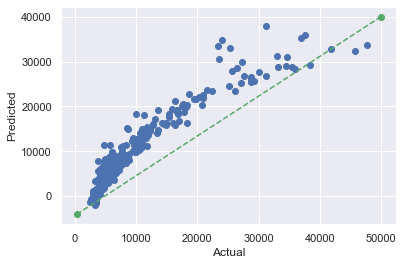

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
model_performance("Linear Regression",lin_reg)


Decision Tree Regression


RMSE_Train: 112.4258
CV_RMSE: 2962.2214
---------------------TEST-------------------
RMSE_Test: 2592.8892
accuracy: 91.86959690691955%
Predictions: [31724.   7137.   5092.5 12751.   5546. ]
Labels:    : [47741.0, 9432.0, 5602.0, 14592.0, 5405.0]


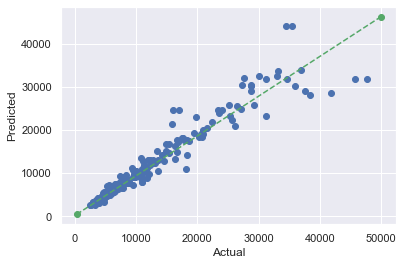

In [94]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
model_performance("Decision Tree Regression",dec_tree)

Gradient Boosting Regression


RMSE_Train: 3820.4949
CV_RMSE: 4300.7274
---------------------TEST-------------------
RMSE_Test: 3172.5002
accuracy: 87.82840537352547%
Predictions: [ 7426.93121457  3163.07429402 14896.76279205 10195.57914967
  4084.09103183]
Labels:    : [8344.0, 2523.0, 9948.0, 10725.0, 4188.0]


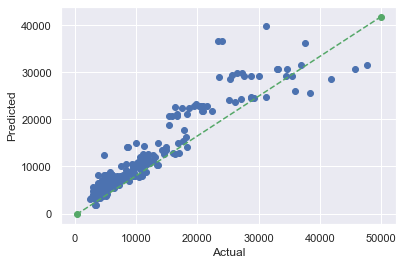

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
model_performance("Gradient Boosting Regression",grad_reg) 

Random Forest Regression

In [ ]:
from pycaret.regression import *

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

In [84]:
from pycaret.regression import *

In [91]:
s2 = setup(diamonds, target = 'Price', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['Carat Weight'])

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(1200, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(839, 62)"


In [92]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1313.1350,5281651.5000,2298.1843,0.9259,0.1772,0.1292
1,1264.9247,3950048.5000,1987.4729,0.9646,0.1487,0.1078
2,1298.8992,6557709.5000,2560.8025,0.9377,0.1554,0.1209
3,1259.5452,5648231.5000,2376.6008,0.9473,0.1398,0.1063
4,1111.8938,2589901.7500,1609.3171,0.9750,0.1701,0.1254
5,952.1097,2013370.2500,1418.9327,0.9682,0.1692,0.1152
6,1319.4886,7969652.0000,2823.0571,0.8800,0.1467,0.1146
7,990.3865,2700151.5000,1643.2137,0.9002,0.1567,0.1127
8,1316.2852,4455053.0000,2110.6997,0.9469,0.1618,0.1186
9,1411.1376,7213918.0000,2685.8738,0.9518,0.1349,0.1028


In [95]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1221.0387,4875272.8400,2208.0020,0.9316,0.1443,0.1096
1,1741.0298,9188290.3072,3031.2193,0.9176,0.1535,0.1126
2,1325.5774,5620895.6458,2370.8428,0.9466,0.1573,0.1139
3,1711.9137,12527132.8728,3539.3690,0.8832,0.1750,0.1338
4,1346.2381,6931731.3512,2632.8181,0.9331,0.1555,0.1140
5,1050.9048,3699169.2381,1923.3224,0.9415,0.1424,0.1012
6,1226.6190,5255197.4048,2292.4217,0.9209,0.1390,0.1042
7,1148.9107,4128554.9315,2031.8846,0.8473,0.1498,0.1159
8,1379.0417,6263906.6935,2502.7798,0.9253,0.1538,0.1152
9,1425.0783,8920927.3792,2986.7922,0.9404,0.1460,0.1025


In [96]:
save_model(dt, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                              top_features_to_pick_percentage=None)),
                 ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=None, max_features=None,
                    

In [97]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [98]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                             top_features_to_pick_percentage=None)),
                ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                     